In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f1_data = pd.read_csv('data.csv')  

In [3]:
race1_data = f1_data[f1_data["race_circuit"] == "race_01_albert_park"]
# f1_data["race_circuit"].drop_duplicates()[0:1] # Alternative race track selection method

In [4]:
driver_list = race1_data["driver"].drop_duplicates()

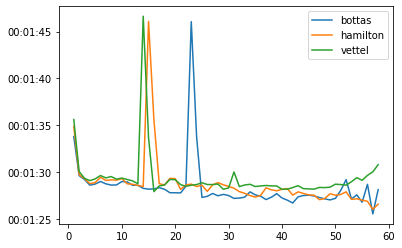

In [5]:
for driver in driver_list[:3]:
    x = race1_data[race1_data["driver"]==str(driver)]["lap"]
    y = pd.to_datetime(race1_data[race1_data["driver"]==str(driver)]["lap_time"].astype(str).str.zfill(9),format='%M:%S.%f')
    plt.plot(x, y, label=str(driver))
plt.legend()
plt.show()